## Data Science Lab Assignment 9
#### Name : Boganadham Venkata Sai Manoj
#### Section : A
#### Roll no : 197121
----------------------------------------------------------------------------------------
## **1. Implement the Principal Component Analysis**

First, import the required modules and dataset into the notebook

In [59]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# mounting the google drive folder 
drive.mount("/content/drive/")

# importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/DSc/Lab9/iris.csv", header=None)
dataset.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Scale the dataset

We will normalize the dataset using Z-score Normalization

In [71]:
# Dividing the dataset into X and Y
X = dataset.iloc[:, :4]
Y = dataset.iloc[:, 3:4]

print("Shapes of the X and Y:")
print(X.shape, Y.shape)

# Z score normalization
# Performed normalization on each column
m = X.shape[1]
for i in range(m):
  X[i] = (X[i] - X[i].mean())/X[i].std()


Shapes of the X and Y:
(150, 4) (150, 1)


Converting the X into Numpy array

In [80]:
X = X.values
print(X[:5])

[[-0.89767388  1.02861128 -1.33679402 -1.30859282]
 [-1.13920048 -0.12454038 -1.33679402 -1.30859282]
 [-1.38072709  0.33672028 -1.39346985 -1.30859282]
 [-1.50149039  0.10608995 -1.28011819 -1.30859282]
 [-1.01843718  1.25924161 -1.33679402 -1.30859282]]


Calculate the covariance matrix of X

In [81]:
# Calculating the covariance matrix using numpy
X = X-X.mean()
covX = np.cov(X , rowvar = False)

print("Covariance matrix of the features")
print(covX)

Covariance matrix of the features
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


Calculating the Eigen values and vectors from the covariance matrix

In [82]:
# Calculate the Eigen values and vectors using numpy
eigen_values , eigen_vectors = np.linalg.eigh(covX)

print("Eigen values: ", eigen_values)
print("Eigen vectors: ", eigen_vectors)

Eigen values:  [0.02060771 0.14735328 0.92122093 2.91081808]
Eigen vectors:  [[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]


Sort the eigen vectors according to the eigen values

In [83]:
# Sorting the eigen vectors
# first we get the descending sorted state of eigen values indices
sortedIndex = np.argsort(eigen_values)[::-1]

# then we sort the eigen values and vectors according to indices
sortedValues = eigen_values[sortedIndex]
sortedVectors = eigen_vectors[:,sortedIndex]

print("Sorted Eigen values: ", sortedValues)
print("Sorted Eigen vectors: ", sortedVectors)

Sorted Eigen values:  [2.91081808 0.92122093 0.14735328 0.02060771]
Sorted Eigen vectors:  [[-0.52237162  0.37231836  0.72101681  0.26199559]
 [ 0.26335492  0.92555649 -0.24203288 -0.12413481]
 [-0.58125401  0.02109478 -0.14089226 -0.80115427]
 [-0.56561105  0.06541577 -0.6338014   0.52354627]]


Plotting the percentage of variance explained

[0.5        0.33333333 0.16666667 0.        ]


<BarContainer object of 4 artists>

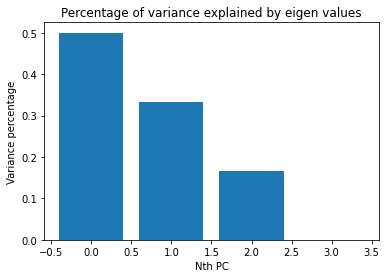

In [84]:
# Plot the percentage of variance explained
# To find the percentage of variance explained, divide each eigen value with the sum of all eigen values
percVariance = sortedIndex/sortedIndex.sum()
print(percVariance)

# Plot the variance percentage data
plt.title("Percentage of variance explained by eigen values")
plt.xlabel("Nth PC")
plt.ylabel("Variance percentage")
plt.bar(range(0,len(percVariance)), percVariance)

A function that returns first K eigen values

In [46]:
# Function for choosing the first k eigen vectors
def firstKEigen(sortedEigenValues, sortedEigenVectors, k):
  return sortedEigenValues[:k], sortedEigenVectors[:,:k]

print(firstKEigen(sortedValues, sortedVectors, 3))

(array([2.91081808, 0.92122093, 0.14735328]), array([[-0.52237162,  0.37231836,  0.72101681],
       [ 0.26335492,  0.92555649, -0.24203288],
       [-0.58125401,  0.02109478, -0.14089226],
       [-0.56561105,  0.06541577, -0.6338014 ]]))


A function that can transform dataset using Eigen vectors

In [47]:
# Transforming the original matrix
def PCA_transform(X, eigen_values, eigen_vectors, k):
  print("Old shape of X: ", X.shape)
  X = X - np.mean(X , axis = 0)
  # getting the first k eigen vectors
  pValues, pVectors = firstKEigen(eigen_values, eigen_vectors, k)

  #Transform the data 
  X_reduced = np.dot(pVectors.transpose(),X.transpose()).transpose()
  print("New shape of X: ", X_reduced.shape)
  return X_reduced


In [54]:
# Using the functions to transform the data
pca_x = PCA_transform(X, sortedValues, sortedVectors, 3)

print(pca_x[:10])

# Using the functions to transform the data
pca_x = PCA_transform(X, sortedValues, sortedVectors, 2)

print(pca_x[:10])

Old shape of X:  (150, 4)
New shape of X:  (150, 3)
[[ 2.25698063  0.5040154   0.12153619]
 [ 2.07945912 -0.65321639  0.22649206]
 [ 2.36004408 -0.31741394 -0.05130774]
 [ 2.29650366 -0.57344661 -0.09853036]
 [ 2.38080159  0.67251441 -0.0213563 ]
 [ 2.06362348  1.51347827 -0.03058181]
 [ 2.43754534  0.07431372 -0.34105507]
 [ 2.22638327  0.24678717  0.08229876]
 [ 2.3341381  -1.09148977 -0.15304967]
 [ 2.18136797 -0.44713112  0.24573628]]
Old shape of X:  (150, 4)
New shape of X:  (150, 2)
[[ 2.25698063  0.5040154 ]
 [ 2.07945912 -0.65321639]
 [ 2.36004408 -0.31741394]
 [ 2.29650366 -0.57344661]
 [ 2.38080159  0.67251441]
 [ 2.06362348  1.51347827]
 [ 2.43754534  0.07431372]
 [ 2.22638327  0.24678717]
 [ 2.3341381  -1.09148977]
 [ 2.18136797 -0.44713112]]


--------------------------------------------------------------------------

## **2. Implement PCA and Logistic Regression for the following dataset by performing the required steps.**

Dataset: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [121]:
#importing the dataset
dataset_heart = pd.read_csv("/content/drive/MyDrive/DSc/Lab9/framingham.csv")
dataset_heart = dataset_heart.dropna() 
dataset_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Scaling the data

In [122]:
# Getting the X_heart and Y_heart with X_heart normalized
X_heart = dataset_heart.iloc[:, :15]
Y_heart = dataset_heart.iloc[:, 15:16]

X_heart = (X_heart-X_heart.mean())/X_heart.std()
print(X_heart.head())

X_heart = X_heart.values

       male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0  1.119672 -1.233182   1.975481      -0.978219   -0.756964 -0.176927   
1 -0.892875 -0.415534   0.019792      -0.978219   -0.756964 -0.176927   
2  1.119672 -0.181920  -0.958052       1.021987    0.921048 -0.176927   
3 -0.892875  1.336571   0.997637       1.021987    1.760053 -0.176927   
4 -0.892875 -0.415534   0.997637       1.021987    1.172749 -0.176927   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0        -0.075997     -0.672606 -0.166808 -0.949584 -1.193531 -1.078267   
1        -0.075997     -0.672606 -0.166808  0.297688 -0.514566 -0.159674   
2        -0.075997     -0.672606 -0.166808  0.184300 -0.220348 -0.243182   
3        -0.075997      1.486347 -0.166808 -0.269254  0.798100  1.009446   
4        -0.075997     -0.672606 -0.166808  1.091407 -0.107187  0.090852   

        BMI  heartRate   glucose  
0  0.291648   0.356291 -0.203099  
1  0.724515   1.608070 -0.244922  

Function to select Principal Components

In [123]:
def PCA(X , k):
    # Subtract the mean of each of the features
    X = X - np.mean(X , axis = 0)
     
    # Calculate the covariance matrix of all features
    covX = np.cov(X , rowvar = False)
     
    # Calculate the eigen values and vectors
    eigenValues , eigenVectors = np.linalg.eigh(covX)
     
    # Sort the vectors according to their eigen values in descending order
    sortedIndex = np.argsort(eigenValues)[::-1]
    sortedValues = eigenValues[sortedIndex]
    sortedVectors = eigenVectors[:,sortedIndex]
     
    # Select first k eigen vectors
    selectedVectors = sortedVectors[:,:k]
     
    # reduce the dataset features
    X_reduced = np.dot(selectedVectors.transpose() , X.transpose() ).transpose()
     
    return X_reduced

In [126]:
# Applying the PCA transformation on the datset
X_heart_pca = PCA(X_heart, 5)

print(X_heart_pca)

[[ 1.79685183  1.01372213  0.03350685  0.56869322  0.04936282]
 [-0.01172063  1.28590574 -0.14807285 -1.48380487  0.3254117 ]
 [ 1.01394579 -1.42505898 -0.13641692  0.34164327  0.57247472]
 ...
 [-2.15791837 -1.21553875 -0.47822535  0.55801546  0.39857234]
 [ 2.15252656 -2.35466298 -0.16901937  0.8386539  -0.71216702]
 [-0.16799165  1.52614171  0.62431642 -0.94517665 -0.47429285]]


Now we fit a Logistic regression model to the transformed data